In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [2]:
data = pd.read_csv('pokemon.csv')

In [3]:
data

,number,pokemon_name,pic_url,main_type,secondary_type,region,category,height,weight,pokemon_family,...,resistance,weakness,wild_avail,egg_avail,raid_avail,research_avail,shiny,shadow,pkedex_desc,poss_attacks
0,1,Bulbasaur,https://static.wikia.nocookie.net/pokemongo/im...,Grass,Poison,Kanto,Seed,0.7 m,6.9 kg,Bulbasaur family,...,"{'62.5%': ['Electric', 'Fairy', 'Fighting', 'W...","{'160%': ['Fire', 'Flying', 'Ice', 'Psychic']}",Yes,No,Formerly (1st tier level),Yes,Yes,Yes,Bulbasaur can be seen napping in bright sunlig...,"['Tackle', 'Vine Whip', 'Power Whip', 'Seed Bo..."
1,2,Ivysaur,https://static.wikia.nocookie.net/pokemongo/im...,Grass,Poison,Kanto,Seed,1 m,13 kg,Bulbasaur family,...,"{'62.5%': ['Electric', 'Fairy', 'Fighting', 'W...","{'160%': ['Fire', 'Flying', 'Ice', 'Psychic']}",Yes,No,Formerly (1st tier level),No,Yes,Yes,There is a bud on this Pokémon's back. To supp...,"['Razor Leaf', 'Vine Whip', 'Power Whip', 'Slu..."
2,3,Venusaur,https://static.wikia.nocookie.net/pokemongo/im...,Grass,Poison,Kanto,Seed,2 m,100 kg,Bulbasaur family,...,"{'62.5%': ['Electric', 'Fairy', 'Fighting', 'W...","{'160%': ['Fire', 'Flying', 'Ice', 'Psychic']}",Yes,No,Formerly (3rd tier level),Formerly,Yes,Yes,Standard Pokédex description\nThere is a large...,"['Razor Leaf', 'Vine Whip', 'Petal Blizzard', ..."
3,4,Charmander,https://static.wikia.nocookie.net/pokemongo/im...,Fire,NaN,Kanto,Lizard,0.6 m,8.5 kg,Charmander family,...,"{'62.5%': ['Bug', 'Fairy', 'Fire', 'Grass', 'I...","{'160%': ['Ground', 'Rock', 'Water']}",Yes,No,Formerly (1st tier level),Yes,Yes,Yes,The flame that burns at the tip of its tail is...,"['Ember', 'Scratch', 'Flame Burst', 'Flame Cha..."
4,5,Charmeleon,https://static.wikia.nocookie.net/pokemongo/im...,Fire,NaN,Kanto,Flame,1.1 m,19 kg,Charmander family,...,"{'62.5%': ['Bug', 'Fairy', 'Fire', 'Grass', 'I...","{'160%': ['Ground', 'Rock', 'Water']}",Yes,No,Formerly (2nd tier level),Formerly,Yes,Yes,Charmeleon mercilessly destroys its foes using...,"['Ember', 'Fire Fang', 'Scratch', 'Fire Punch'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,867,Runerigus,https://static.wikia.nocookie.net/pokemongo/im...,Ground,Ghost,Galar,Grudge,1.6 m,66.6 kg,Yamask family,...,"{'62.5%': ['Bug', 'Rock'], '39%': ['Electric',...","{'160%': ['Dark', 'Ghost', 'Grass', 'Ice', 'Wa...",No,No,No,No,No,No,A powerful curse was woven into an ancient pai...,"['Astonish', 'Rock Tomb', 'Sand Tomb', 'Shadow..."
766,870,Falinks,https://static.wikia.nocookie.net/pokemongo/im...,Fighting,NaN,Galar,Formation,3 m,62 kg,Falinks family,...,"{'62.5%': ['Bug', 'Dark', 'Rock']}","{'160%': ['Fairy', 'Flying', 'Psychic']}",Yes,No,No,Formerly,No,No,"Five of them are troopers, and one is the bras...","['Counter', 'Rock Smash', 'Brick Break', 'Mega..."
767,888,Zacian,"data:image/gif;base64,R0lGODlhAQABAIABAAAAAP//...",Fairy,NaN,Galar,Warrior,2.8 m,110 kg,Zacian family,...,"{'62.5%': ['Bug', 'Dark', 'Fighting'], '39%': ...","{'160%': ['Poison', 'Steel']}",No,No,Formerly (5th tier level),No,No,No,"Known as a legendary hero, this Pokémon absorb...","['Fire Fang', 'Metal Claw', 'Quick Attack', 'S..."
768,889,Zamazenta,"data:image/gif;base64,R0lGODlhAQABAIABAAAAAP//...",Fighting,NaN,Galar,Warrior,2.9 m,210 kg,Zamazenta family,...,"{'62.5%': ['Bug', 'Dark', 'Rock']}","{'160%': ['Fairy', 'Flying', 'Psychic']}",No,No,Formerly (5th tier level),No,No,No,"In times past, it worked together with a king ...","['Ice Fang', 'Metal Claw', 'Quick Attack', 'Sn..."


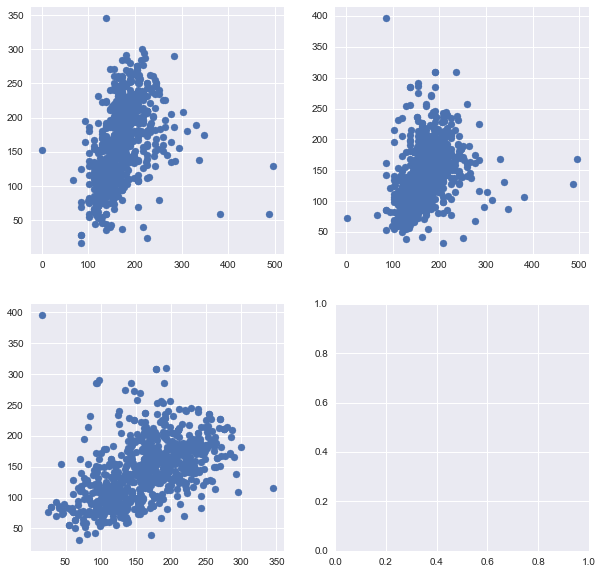

In [4]:
plt.style.use('seaborn')
fig, sub = plt.subplots(2, 2, figsize = (10, 10))
sub[0, 0].scatter(x = data.stamina, y = data.attack)
sub[0, 1].scatter(x = data.stamina, y = data.defense)
sub[1, 0].scatter(x = data.attack, y = data.defense)

<AxesSubplot:xlabel='main_type', ylabel='stamina'>

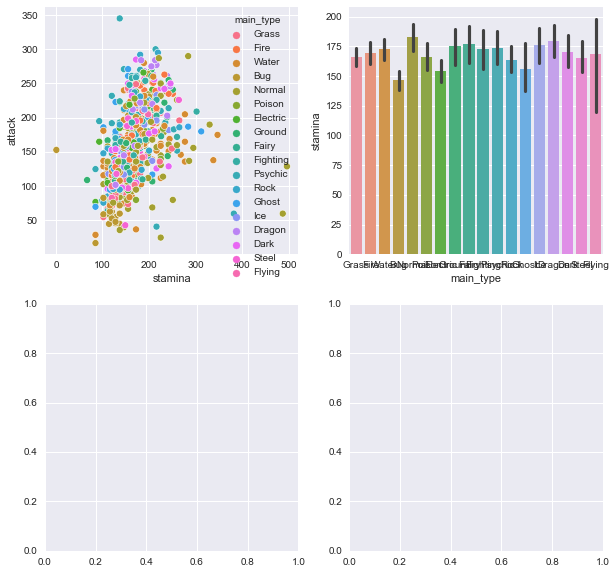

In [5]:
fig, sub = plt.subplots(2, 2, figsize = (10, 10))
sns.scatterplot(ax = sub[0,0], x = data.stamina, y = data.attack, hue = data.main_type)
sns.barplot(ax = sub[0,1], x = data.main_type, y = data.stamina)

In [6]:
attack = data.groupby('pokemon_family').mean()['attack'].sort_values(ascending = False)[:10]
attack

pokemon_family
Deoxys family       345.0
Mewtwo family       300.0
Regigigas family    287.0
Darkrai family      285.0
Rayquaza family     284.0
Palkia family       280.0
Zekrom family       275.0
Dialga family       275.0
Reshiram family     275.0
Azelf family        270.0
Name: attack, dtype: float64

<AxesSubplot:xlabel='pokemon_family'>

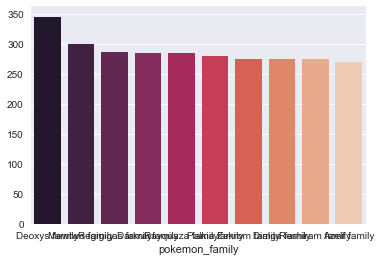

In [7]:
sns.barplot(x = attack.index, y = attack.values, palette = 'rocket')

In [8]:
defense = data.groupby('pokemon_family').mean()['defense'].sort_values(ascending = False)[:10]

In [9]:
defense

pokemon_family
Shuckle family      396.0
Lugia family        310.0
Regice family       309.0
Regirock family     309.0
Carbink family      285.0
Diancie family      285.0
Registeel family    285.0
Uxie family         270.0
Cresselia family    258.0
Tapu Fini family    254.0
Name: defense, dtype: float64

In [10]:
x = []
for i in data.weight.to_list():
    val = round(float(i.strip().split()[0]))
    x.append(val)

In [11]:
data['kg'] = x

In [12]:
ratio = data.kg/data.attack

In [13]:
data['attack_r'] = ratio

In [14]:
dummy = data.sort_values('attack_r', ascending = False)[:10]
dummy

,number,pokemon_name,pic_url,main_type,secondary_type,region,category,height,weight,pokemon_family,...,wild_avail,egg_avail,raid_avail,research_avail,shiny,shadow,pkedex_desc,poss_attacks,kg,attack_r
486,487,Giratina,https://static.wikia.nocookie.net/pokemongo/im...,Ghost,Dragon,Sinnoh,Renegade,4.5 m,750 kg,Giratina family,...,No,No,Formerly (5th tier level),No,Yes,No,It was banished for its violence. It silently ...,"['Dragon Breath', 'Shadow Claw', 'Ancient Powe...",750,4.010695
756,809,Melmetal,https://static.wikia.nocookie.net/pokemongo/im...,Steel,NaN,Unknown,Hex,2.5 m,800 kg,Meltan family,...,No,No,No,No,Yes,No,Revered long ago for its capacity to create ir...,"['Thunder Shock', 'Flash Cannon', 'Hyper Beam'...",800,3.539823
382,383,Groudon,https://static.wikia.nocookie.net/pokemongo/im...,Ground,NaN,Hoenn,Continent,3.51 m,950 kg,Groudon family,...,No,No,Formerly (5th tier level),No,Yes,No,Standard Pokédex description\nGroudon is said ...,"['Dragon Tail', 'Mud Shot', 'Earthquake', 'Fir...",950,3.518519
717,718,Zygarde,https://static.wikia.nocookie.net/pokemongo/im...,Dragon,Ground,Kalos,Order,4.5 m,610.0 kg,Zygarde family,...,No,No,No,No,No,No,Standard Pokédex description\nWhen the Kalos r...,"['Bite', 'Dragon Tail', 'Zen Headbutt', 'Bulld...",610,3.004926
207,208,Steelix,https://static.wikia.nocookie.net/pokemongo/im...,Steel,Ground,Johto,Iron,9.2 m,400 kg,Onix family,...,No,No,No,No,Yes,No,Standard Pokédex description\nSteelix lives ev...,"['Dragon Tail', 'Iron Tail', 'Thunder Fang', '...",400,2.702703
712,713,Avalugg,https://static.wikia.nocookie.net/pokemongo/im...,Ice,NaN,Kalos,Iceberg,2.0 m,505.0 kg,Bergmite family,...,No,No,No,No,No,No,Its ice-covered body is as hard as steel. Its ...,"['Bite', 'Ice Fang', 'Avalanche', 'Body Slam',...",505,2.576531
475,476,Probopass,https://static.wikia.nocookie.net/pokemongo/im...,Rock,Steel,Sinnoh,Compass,1.4 m,340 kg,Nosepass family,...,No,No,No,No,Yes,Yes,It uses three small units to catch prey and ba...,"['Rock Throw', 'Spark', 'Magnet Bomb', 'Rock S...",340,2.518519
482,483,Dialga,https://static.wikia.nocookie.net/pokemongo/im...,Steel,Dragon,Sinnoh,Temporal,5.4 m,683 kg,Dialga family,...,No,No,Formerly (5th tier level),No,Yes,No,It has the power to control time. It appears i...,"['Dragon Breath', 'Metal Claw', 'Draco Meteor'...",683,2.483636
94,95,Onix,https://static.wikia.nocookie.net/pokemongo/im...,Rock,Ground,Kanto,Rock,8.8 m,210 kg,Onix family,...,Yes,No,Formerly (1st tier level),Yes,Yes,No,Onix has a magnet in its brain. It acts as a c...,"['Rock Throw', 'Tackle', 'Heavy Slam', 'Sand T...",210,2.470588
142,143,Snorlax,https://static.wikia.nocookie.net/pokemongo/im...,Normal,NaN,Kanto,Sleeping,2.1 m,460 kg,Snorlax family,...,Yes,No,Formerly (3rd tier level),Formerly,Yes,Yes,Snorlax's typical day consists of nothing more...,"['Lick', 'Zen Headbutt', 'Yawn', 'Body Slam', ...",460,2.421053


<AxesSubplot:xlabel='pokemon_name', ylabel='attack_r'>

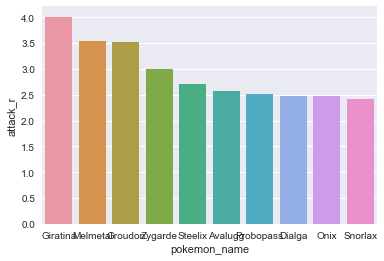

In [15]:
sns.barplot(x = dummy.pokemon_name, y = dummy.attack_r)